# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


# If you make the rate too huge, the model might overshoot the goal and just keep bouncing around without ever settling down. But if you make it too tiny, it takes forever to get anywhere and might get stuck in the wrong spot. You basically have to find an optimal one to actually find the minimum.
# Common strategies for choosing maybe :
# 1) Constant Learning rate
# 2)learning rate decay : where alpha  = alpha0/(1+k*t)
# 3)Adaptive learning rate : using algorithms

How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?



#  Question 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Read the dataset
url = "/content/Real estate.csv"
df = pd.read_csv(url)

# 2. Clean and Prepare Data
# Remove unwanted columns
df_clean = df.drop(['No', 'X1 transaction date'], axis=1)

# Separate Features and Target
X = df_clean.iloc[:, :-1].values
y = df_clean.iloc[:, -1].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- MODEL TRAINING ---

# 1. Batch Gradient Descent (using standard Linear Regression)
bgd_model = LinearRegression()
bgd_model.fit(X_train_scaled, y_train)

# 2. Stochastic Gradient Descent
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, learning_rate='invscaling', random_state=42)
sgd_model.fit(X_train_scaled, y_train)

# --- PREDICTIONS ---
y_pred_bgd = bgd_model.predict(X_test_scaled)
y_pred_sgd = sgd_model.predict(X_test_scaled)

# --- EVALUATION ---
mse_bgd = mean_squared_error(y_test, y_pred_bgd)
r2_bgd = r2_score(y_test, y_pred_bgd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("Batch GD Results:")
print("MSE:", mse_bgd)
print("R2 Score:", r2_bgd)

print("\nSGD Results:")
print("MSE:", mse_sgd)
print("R2 Score:", r2_sgd)

# --- EXPERIMENTAL ---
print("\nExperimental SGD (low learning rate):")
sgd_exp = SGDRegressor(max_iter=50, eta0=0.0001, learning_rate='constant', random_state=42)
sgd_exp.fit(X_train_scaled, y_train)
y_pred_exp = sgd_exp.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred_exp))

Batch GD Results:
MSE: 66.74857426921264
R2 Score: 0.5791882522907397

SGD Results:
MSE: 65.12251016745269
R2 Score: 0.5894396604150403

Experimental SGD (low learning rate):
MSE: 104.66264548767941


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


h) While Batch Gradient Descent takes a smooth, direct path by processing all data at once, Stochastic Gradient Descent  moves in a noisy, zigzag pattern because it updates the model using just one example at a time. Despite this erratic behavior, SGD is preferred for large datasets because it saves memory, allows for immediate progress without processing millions of samples first, and its random noise actually helps the model escape local minima to find better overall solutions.

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



3.1
a) Decision Trees are Supervised Learning algorithms. They require a labeled dataset during training to learn the splitting rules that map inputs to outputs.

b) Entropy is a measure of randomness in a dataset.

c)Reduction in entropy signifies an deacrease in randomness. It means the split has successfully organized the data such that the resulting child nodes are more homogenous than the parent node. The algorithm chooses the split that maximizes this reduction.

d)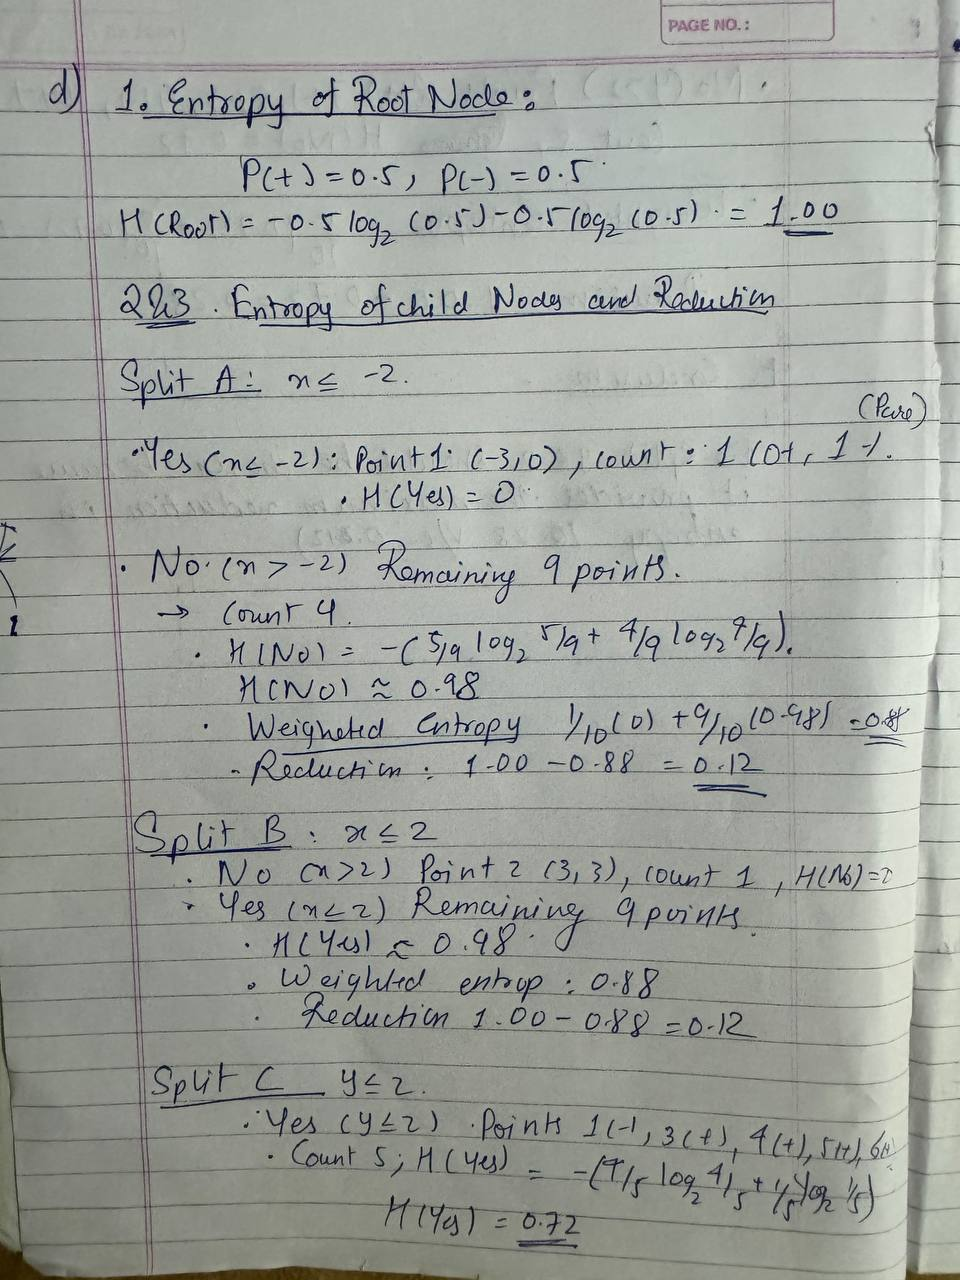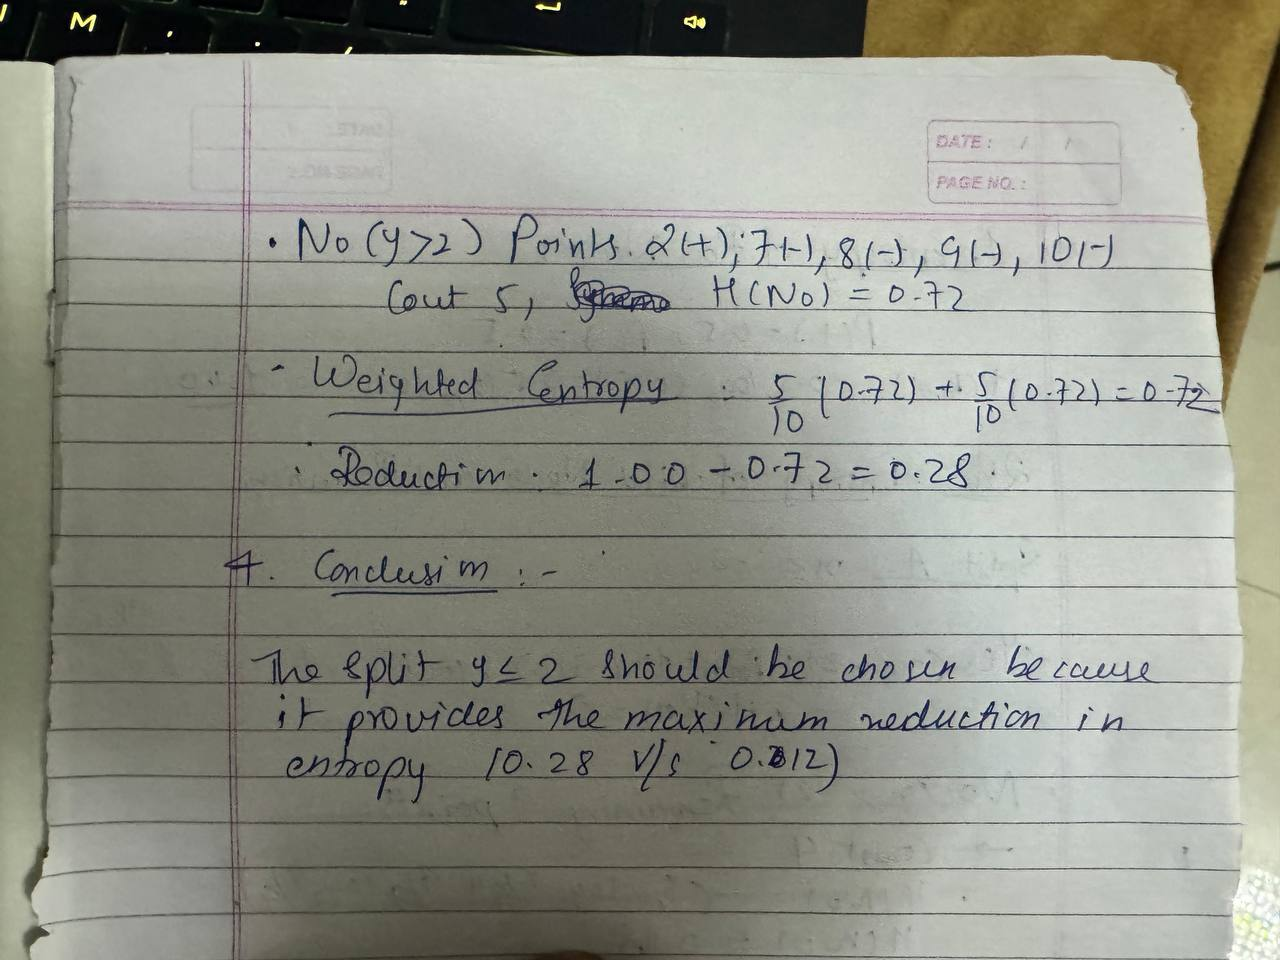

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


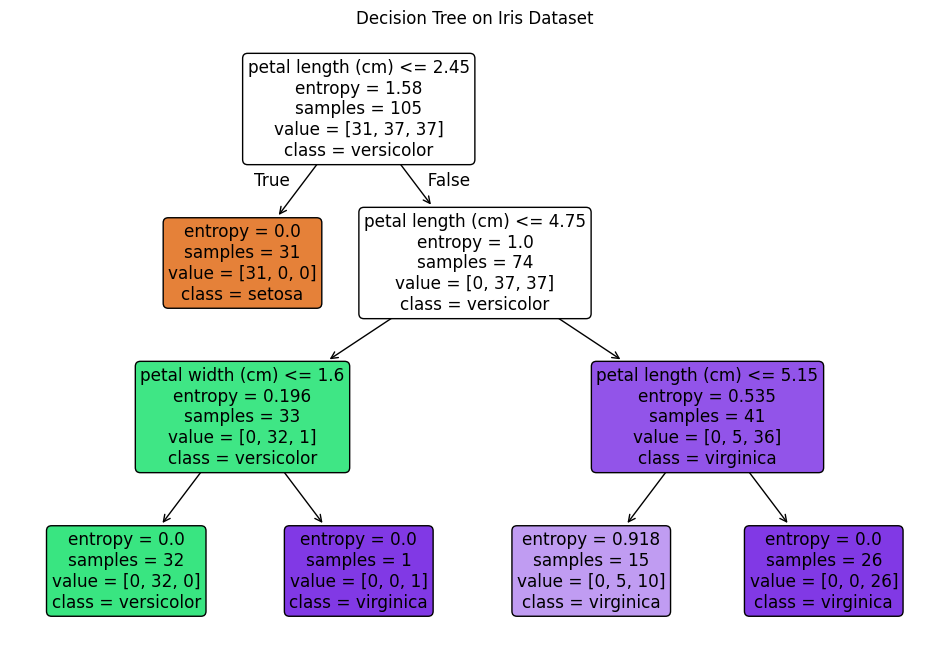

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load Data
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split Data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 4. Visualize
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree on Iris Dataset")
plt.show()

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



a) SVM is a Supervised Learning algorithm. It uses labeled training data to learn a hyperplane that classifies new data points.

b)The margin is the perpendicular distance between the decision boundary and the nearest data points from either class.If the margin is wide, slight perturbations or noise in the data are less likely to cause a point to cross the line and be misclassified. It improves the model's ability to generalize to unseen data.

c)Support vectors are the specific data points that lie closest to the decision boundary. They are the hardest points to classify.They are the only points that matter. If you remove other points far from the boundary, the hyperplane won't move. The support vectors entirely define the position and orientation of the boundary.

d)To make data that is not linearly separable in the original space linearly separable in the higher dimension.

Common Kernels: Linear Kernel, Polynomial Kernel


### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

a) In a linearly separable dataset, SVM chooses the hyperplane that maximizes the margin .

b)When data is not linearly separable, SVM handles it in two ways:

Soft Margin: It allows some misclassifications to ignore outliers and find the best possible fit.

Kernel Trick: It projects the data into a higher-dimensional space where the points become linearly separable, allowing a flat hyperplane in 3D to act as a curved decision boundary in 2D.

c) C controls the trade-off between having a smooth decision boundary and classifying all training points correctly.

Very Large C: Strict. The model tries hard not to misclassify any training point. Result: Narrow margin, potential Overfitting.

Very Small C: Lenient. The model accepts some misclassifications to maintain a wider margin. Result: Smoother boundary, potential Underfitting.